# Olympics Data Exploration

Date: 28/02

Writers:
* Zihang WANG
* Liyang  FANG
* Duytan Le

## Data Pre-Processing

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 120 years data processing

In [2]:

# Import data
athlete_df = pd.read_csv('DataSet/athlete_events.csv')
regions_df = pd.read_csv('DataSet/noc_regions.csv')

In [3]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Merge datasets
olympics = athlete_df.merge(regions_df,on='NOC',how='left')

In [6]:
olympics.loc[olympics['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [7]:
# Reassign the NOC to country
olympics['region'] = np.where(olympics['NOC']=='SGP', 'Singapore', olympics['region'])
olympics['region'] = np.where(olympics['NOC']=='ROT', 'Refugee Olympic Athletes', olympics['region'])
olympics['region'] = np.where(olympics['NOC']=='UNK', 'Unknown', olympics['region'])
olympics['region'] = np.where(olympics['NOC']=='TUV', 'Tuvalu', olympics['region'])

In [8]:
# Check missing values in region
olympics.loc[olympics['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team


In [9]:
# Check missing values
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region         0
notes     266077
dtype: int64

In [10]:
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [11]:
# Feature selection
olympics.drop(olympics.columns[[0,6,7,8,11,13,16]], axis=1, inplace=True)

olympics = olympics.rename(columns={'region': 'Country'})
olympics['Sex'] = olympics['Sex'].replace({'M':'Male','F':'Female'})

In [12]:
olympics.head()

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,A Dijiang,Male,24.0,180.0,80.0,1992,Summer,Basketball,NaN,China
1,A Lamusi,Male,23.0,170.0,60.0,2012,Summer,Judo,NaN,China
2,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,1920,Summer,Football,NaN,Denmark
3,Edgar Lindenau Aabye,Male,34.0,NaN,NaN,1900,Summer,Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,Female,21.0,185.0,82.0,1988,Winter,Speed Skating,NaN,Netherlands


### Totkyo2020 data processing

In [13]:
# Import data
tokyo_athlete_df = pd.read_csv('DataSet/tokyo_athletes.csv')
tokyo_medal_df = pd.read_csv('DataSet/tokyo_medals.csv')

In [14]:
tokyo_athlete_df.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [15]:
tokyo_medal_df.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24 00:00:00.0,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24 00:00:00.0,AN S,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24 00:00:00.0,SCHLOESSER G,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24 00:00:00.0,WIJLER S,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24 00:00:00.0,ALVAREZ L,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [16]:
tokyo = tokyo_medal_df.merge(tokyo_athlete_df, left_on='athlete_name', right_on='name', how='left')
tokyo['country_code_x'] = tokyo['country_code_x'].replace({'ROC':'CHN'})
tokyo = tokyo.merge(regions_df, left_on='country_code_x',right_on='NOC',how='left')
tokyo.columns

Index(['medal_type', 'medal_code', 'medal_date', 'athlete_short_name',
       'athlete_name', 'athlete_sex', 'athlete_link', 'country_code_x',
       'discipline_code_x', 'event', 'country_x', 'discipline_x', 'name',
       'short_name', 'gender', 'birth_date', 'birth_place', 'birth_country',
       'country_y', 'country_code_y', 'discipline_y', 'discipline_code_y',
       'residence_place', 'residence_country', 'height_m/ft', 'url', 'NOC',
       'region', 'notes'],
      dtype='object')

In [17]:
tokyo = tokyo[['medal_type', 'athlete_name', 'athlete_sex', 'gender', 'discipline_x', 'discipline_y', 'discipline_code_y', 'country_code_x', 'country_x', 'NOC', 'region']]

In [18]:
# Check missing data
null_rows = tokyo[tokyo.isnull().any(axis=1)]
print(null_rows)

        medal_type       athlete_name athlete_sex gender         discipline_x  \
136   Silver Medal    TANIGAWA Wataru           M    NaN  Artistic Gymnastics   
137   Silver Medal    KITAZONO Takeru           M    NaN  Artistic Gymnastics   
298   Bronze Medal      FRY Charlotte           O    NaN           Equestrian   
404   Bronze Medal   HAUSDING Patrick           M    NaN               Diving   
465     Gold Medal       STEPHAN Lucy           W    NaN               Rowing   
673   Bronze Medal     SMULDERS Merel           W    NaN   Cycling BMX Racing   
695     Gold Medal       BOSWORTH Sam           M    NaN               Rowing   
824   Silver Medal  LEMBACH Charlotte           W    NaN              Fencing   
1021  Bronze Medal      PALMER Krysta           W    NaN               Diving   
1361  Bronze Medal       XAMMAR Jordi           M    NaN              Sailing   
1458  Silver Medal      ZALEWSKI Aran           M    NaN               Hockey   
1474  Bronze Medal     LAKRA

In [19]:
# Reassign gender enumerations
null_rows['athlete_sex'] = null_rows['athlete_sex'].replace({'W': 'Female', **{value: 'Male' for value in \
                                                                     null_rows['athlete_sex'].unique() if value != 'W'}})
null_rows['gender'] = null_rows['athlete_sex']
null_rows['discipline_y'] = null_rows['discipline_x']
tokyo.loc[null_rows.index] = null_rows

In [20]:
tokyo.drop(columns=['athlete_sex','discipline_x','discipline_code_y'],inplace = True)

In [21]:
tokyo = tokyo[['athlete_name', 'gender', 'discipline_y', 'medal_type', 'region']]
tokyo.columns = ['Name', 'Sex', 'Sport', 'Medal', 'Country']


In [22]:
tokyo.insert(2,'Year', 2020,)
tokyo.insert(3,'Season', 'Summer')

In [23]:
tokyo.head(-5)

,Name,Sex,Year,Season,Sport,Medal,Country
0,KIM Je Deok,Male,2020,Summer,Archery,Gold Medal,South Korea
1,AN San,Female,2020,Summer,Archery,Gold Medal,South Korea
2,SCHLOESSER Gabriela,Female,2020,Summer,Archery,Silver Medal,Netherlands
3,WIJLER Steve,Male,2020,Summer,Archery,Silver Medal,Netherlands
4,ALVAREZ Luis,Male,2020,Summer,Archery,Bronze Medal,Mexico
...,...,...,...,...,...,...,...
2403,HARAI Balazs,Male,2020,Summer,Water Polo,Bronze Medal,Hungary
2404,HOSNYANSZKY Norbert,Male,2020,Summer,Water Polo,Bronze Medal,Hungary
2405,JANSIK Szilard,Male,2020,Summer,Water Polo,Bronze Medal,Hungary
2406,MANHERCZ Krisztian,Male,2020,Summer,Water Polo,Bronze Medal,Hungary


In [24]:
null_rows = tokyo[tokyo.isnull().any(axis=1)]
null_rows

,Name,Sex,Year,Season,Sport,Medal,Country


In [25]:
tokyo['Medal'] = tokyo['Medal'].replace({'Gold Medal': 'Gold', 'Silver Medal': 'Silver', 'Bronze Medal': 'Bronze'})

In [26]:
tokyo.head()

,Name,Sex,Year,Season,Sport,Medal,Country
0,KIM Je Deok,Male,2020,Summer,Archery,Gold,South Korea
1,AN San,Female,2020,Summer,Archery,Gold,South Korea
2,SCHLOESSER Gabriela,Female,2020,Summer,Archery,Silver,Netherlands
3,WIJLER Steve,Male,2020,Summer,Archery,Silver,Netherlands
4,ALVAREZ Luis,Male,2020,Summer,Archery,Bronze,Mexico


### Merging data

In [27]:
# Merging 120year data to Tokyo data
olympics_notna = olympics.dropna().reset_index(drop=True)
olympics_merged = pd.concat([olympics_notna, tokyo], ignore_index=True)
olympics_merged.head(-5)

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,Juhamatti Tapio Aaltonen,Male,28.0,184.0,85.0,2014,Winter,Ice Hockey,Bronze,Finland
1,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Bronze,Finland
2,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
3,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
4,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
...,...,...,...,...,...,...,...,...,...,...
32584,HARAI Balazs,Male,NaN,NaN,NaN,2020,Summer,Water Polo,Bronze,Hungary
32585,HOSNYANSZKY Norbert,Male,NaN,NaN,NaN,2020,Summer,Water Polo,Bronze,Hungary
32586,JANSIK Szilard,Male,NaN,NaN,NaN,2020,Summer,Water Polo,Bronze,Hungary
32587,MANHERCZ Krisztian,Male,NaN,NaN,NaN,2020,Summer,Water Polo,Bronze,Hungary



## Information about the dataset

In [28]:
olympics_merged.describe()

,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,32594.000000
mean,25.429012,177.642358,73.753554,1990.374547
std,5.049684,10.924188,15.004992,23.411308
min,13.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,63.000000,1976.000000
50%,25.000000,178.000000,73.000000,1996.000000
75%,28.000000,185.000000,83.000000,2008.000000
max,66.000000,223.000000,182.000000,2020.000000


In [29]:
olympics_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32594 entries, 0 to 32593
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     32594 non-null  object 
 1   Sex      32594 non-null  object 
 2   Age      30181 non-null  float64
 3   Height   30181 non-null  float64
 4   Weight   30181 non-null  float64
 5   Year     32594 non-null  int64  
 6   Season   32594 non-null  object 
 7   Sport    32594 non-null  object 
 8   Medal    32594 non-null  object 
 9   Country  32594 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.5+ MB


## Data Visualization and Insights

### Main participated countries of the Olympics

In [30]:
sns.set_theme()

In [31]:
# Select Top 10 participated countries
olympics_top10 = olympics['Country'].value_counts().nlargest(10)

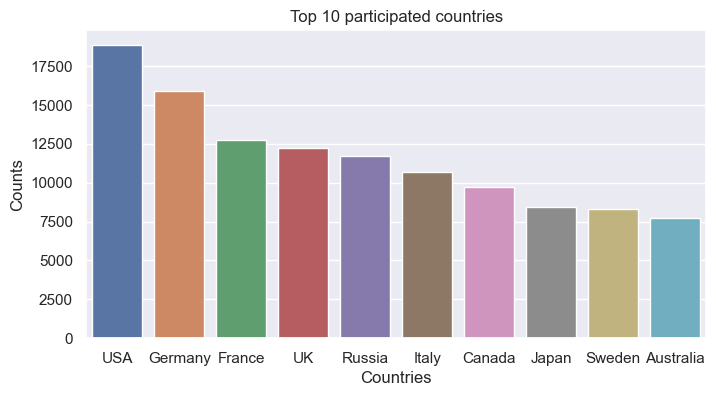

In [32]:
plt.figure(figsize=(8,4))
sns.barplot(x = olympics_top10.index,y = olympics_top10)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.title('Top 10 participated countries')
plt.show()

### Genders analysis

In [33]:
gender_counts = olympics['Sex'].value_counts()
gender_medal_counts = olympics_merged['Sex'].value_counts()

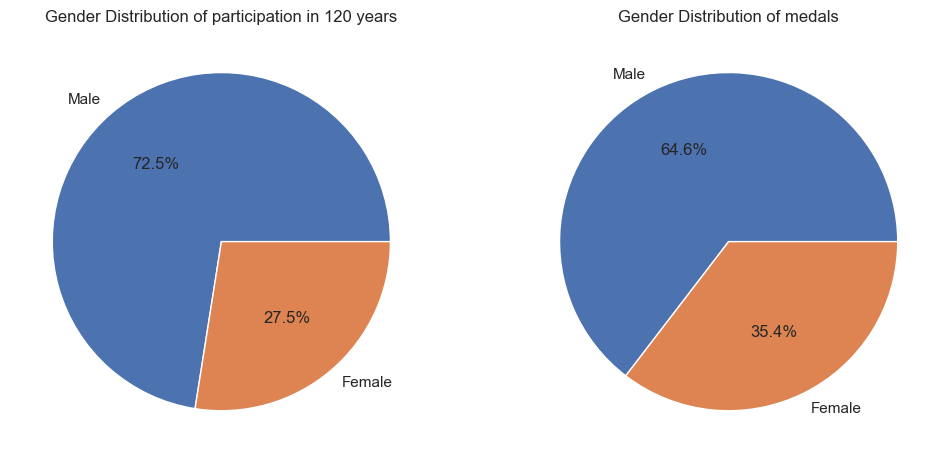

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(gender_counts,labels = gender_counts.index, autopct = '%1.1f%%')
axes[0].set_title('Gender Distribution of participation in 120 years')
axes[1].pie(gender_medal_counts,labels = gender_counts.index, autopct = '%1.1f%%')
axes[1].set_title('Gender Distribution of medals')
sns.set_style("whitegrid")
plt.show()

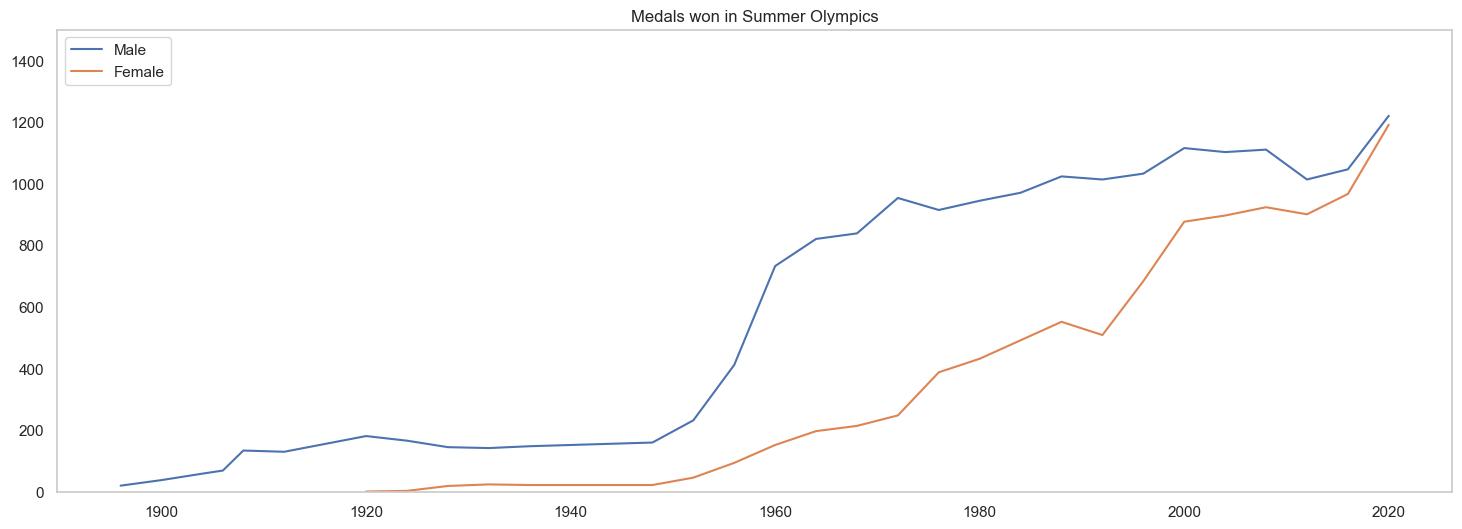

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
summer_data = olympics_merged[olympics_merged['Season'] == 'Summer'].reset_index()
for i, sex in enumerate(summer_data['Sex'].value_counts().index):
    sex_data = summer_data[summer_data['Sex'] == sex]
    sex_distribution = sex_data['Year'].value_counts().sort_index()
    ax.plot(sex_distribution.index, sex_distribution.values, label=sex)

ax.set_ylim(0, 1500)
ax.legend(loc='upper left')
ax.grid()
ax.set_title('Medals won in Summer Olympics')

plt.show()


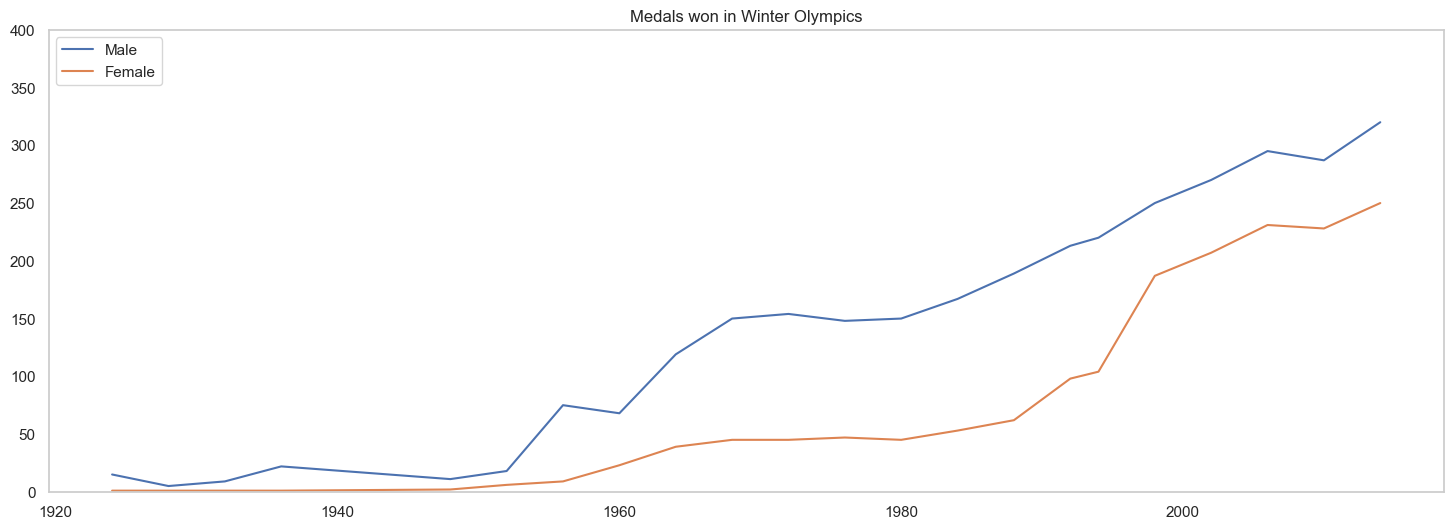

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
summer_data = olympics_merged[olympics_merged['Season'] == 'Winter'].reset_index()
for i, sex in enumerate(summer_data['Sex'].value_counts().index):
    sex_data = summer_data[summer_data['Sex'] == sex]
    sex_distribution = sex_data['Year'].value_counts().sort_index()
    ax.plot(sex_distribution.index, sex_distribution.values, label=sex)

ax.set_ylim(0, 400)
ax.legend(loc='upper left')
ax.grid()
ax.set_title('Medals won in Winter Olympics')

plt.show()

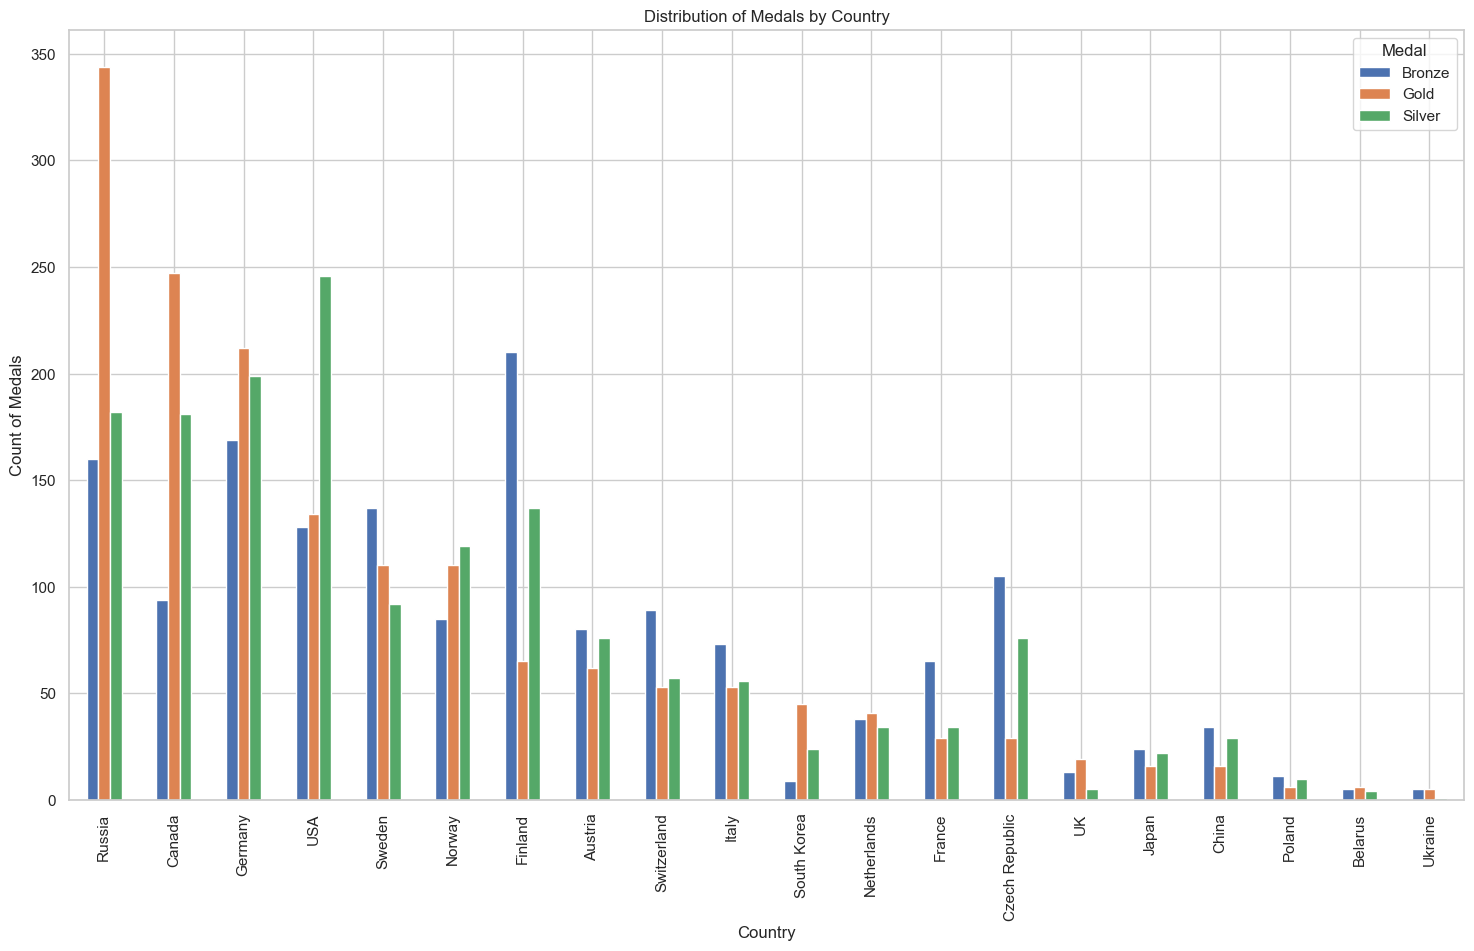

In [37]:
# Group by country
medal_for_country = summer_data.groupby(['Country', 'Medal']).size().reset_index(name='Count')
pivot_df = medal_for_country.pivot(index='Country', columns='Medal', values='Count').sort_values(by='Gold', ascending=False).head(20)
pivot_df.plot(kind='bar', stacked=False, figsize=(18, 10))
plt.xticks(rotation=90)

plt.xlabel('Country')
plt.ylabel('Count of Medals')
plt.title('Distribution of Medals by Country')

plt.show()

In [38]:
# Group by sport
medals_by_sport = summer_data.groupby(['Country', 'Sport']).size().reset_index(name='Medal_Count')
idx = medals_by_sport.groupby('Country')['Medal_Count'].idxmax()
country_best_sports = medals_by_sport.loc[idx].sort_values(by='Medal_Count',ascending = False).head(10)
country_best_sports

,Country,Sport,Medal_Count
30,Canada,Ice Hockey,273
197,USA,Ice Hockey,226
143,Russia,Ice Hockey,218
169,Sweden,Ice Hockey,189
59,Finland,Ice Hockey,174
47,Czech Republic,Ice Hockey,159
123,Norway,Cross Country Skiing,127
74,Germany,Biathlon,110
117,Netherlands,Speed Skating,108
4,Austria,Alpine Skiing,83


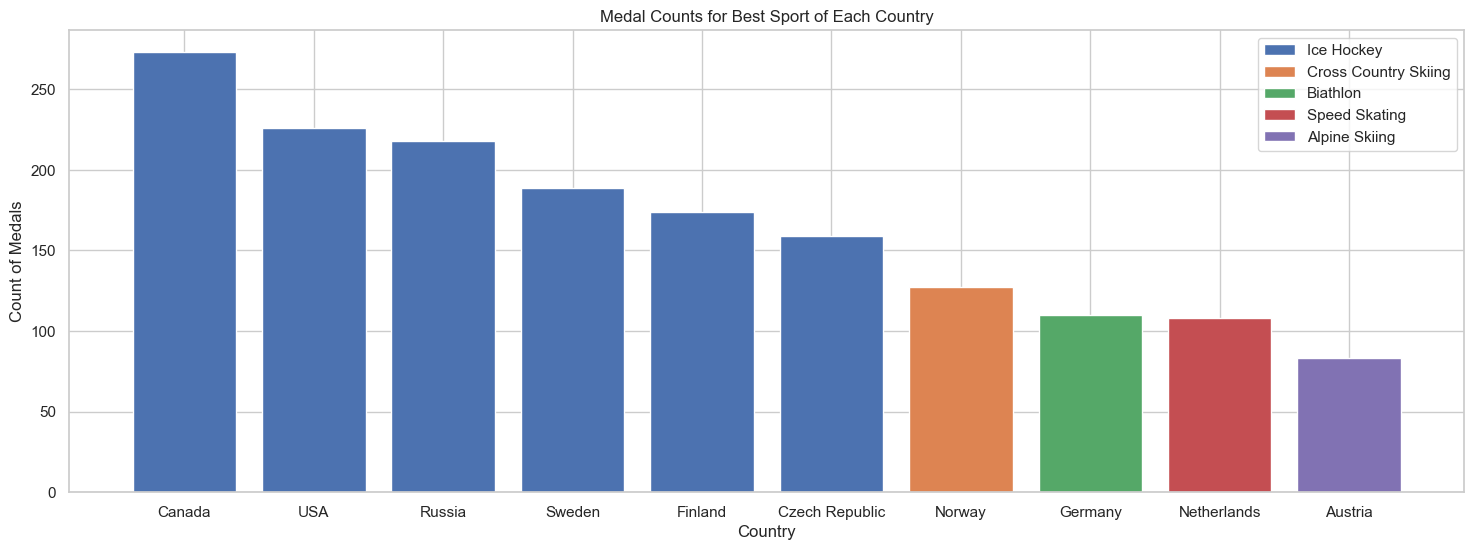

In [39]:
unique_sports = country_best_sports['Sport'].unique()
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
for sport in unique_sports:
    sport_data = country_best_sports[country_best_sports['Sport'] == sport]
    ax.bar(sport_data['Country'], sport_data['Medal_Count'], label=sport)

ax.legend()
ax.set_xlabel('Country')
ax.set_ylabel('Count of Medals')
ax.set_title('Medal Counts for Best Sport of Each Country')

plt.show()

### Medals by Country

Next, we find out about the top 5 gold medal countries

In [40]:
goldMedals = olympics_merged[(olympics_merged.Medal == 'Gold')]
goldMedals.head()

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
2,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
3,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
4,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
6,Kjetil Andr Aamodt,Male,20.0,176.0,85.0,1992,Winter,Alpine Skiing,Gold,Norway
11,Kjetil Andr Aamodt,Male,30.0,176.0,85.0,2002,Winter,Alpine Skiing,Gold,Norway


In [41]:
goldMedals.Country.value_counts().reset_index(name='Medal').head(10)

,Country,Medal
0,USA,2227
1,Russia,1465
2,Germany,1123
3,China,450
4,Canada,398
5,UK,369
6,Australia,355
7,France,350
8,Italy,334
9,Hungary,298


Let's see it on diagram

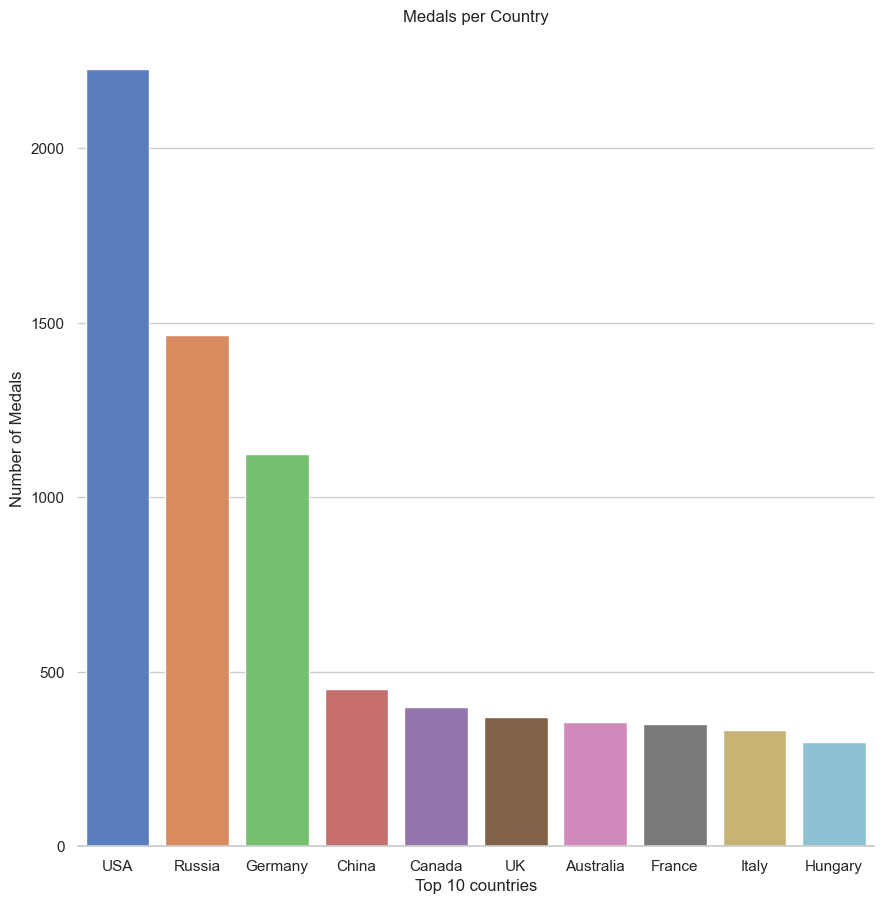

In [42]:
totalGoldMedals = goldMedals.Country.value_counts().reset_index(name='Medal').head(10)

g = sns.catplot(x="Country", y="Medal", data=totalGoldMedals,
                height=9, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')
plt.savefig("./medals_per_country.png")

### Conclusion
- U.S. Dominance: With 2750 medals, the USA demonstrates a significant lead, indicating robust sports infrastructure, investment, and a large pool of athletes.
- Russia's Strong Performance: Russia's 1599 medals reflect its historical strength in the Olympics, influenced by state-sponsored sports programs, particularly during the Soviet era.
- Germany's Consistency: Germany's tally of 1322 medals highlights consistent Olympic performance, including the contributions of both East and West Germany before reunification.
- UK and Italy's Contribution: The UK (717 medals) and Italy (594 medals) show substantial Olympic achievements, potentially linked to strong traditions in specific sports.

## 8. Which sports bring the greatest number of gold medals for France

So next, we want to know what are the sports that France dominates?

![France flag](https://franceintheus.org/local/cache-vignettes/L360xH238/frenchflag-467ab.jpg?1692281446)

In [43]:
goldMedalsFrance = goldMedals.loc[goldMedals['Country'] == 'France']

In [44]:
goldMedalsFrance.Sport.value_counts().reset_index(name='Medal').head(20)

,Sport,Medal
0,Fencing,72
1,Handball,62
2,Cycling,33
3,Judo,26
4,Equestrianism,21
5,Football,16
6,Rowing,14
7,Athletics,13
8,Alpine Skiing,12
9,Volleyball,12


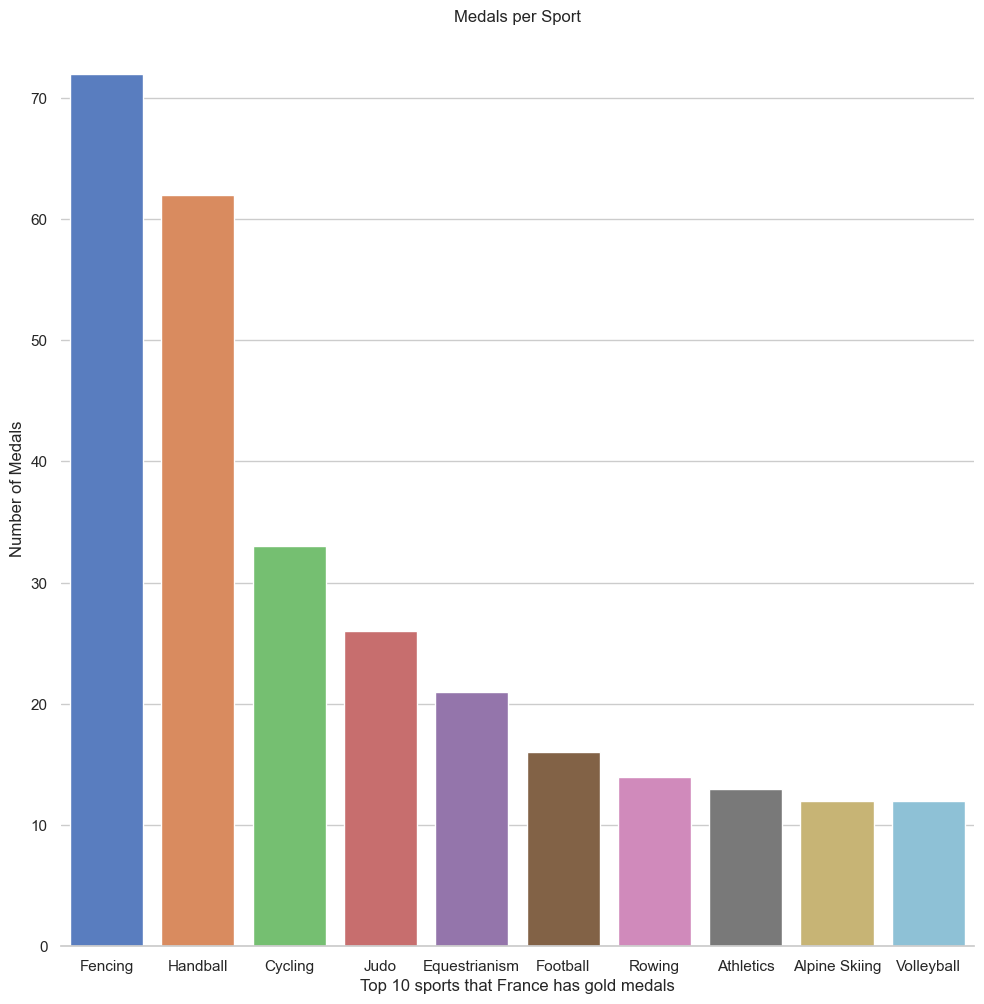

In [45]:
goldMedalsBySportFrance = goldMedalsFrance.Sport.value_counts().reset_index(name='Medal').head(10)

g = sns.catplot(x="Sport", y="Medal", data=goldMedalsBySportFrance,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 sports that France has gold medals")
g.set_ylabels("Number of Medals")
plt.title('Medals per Sport')

plt.savefig("./France_Gold_Medals_by_Sport.png")

### Conclusion

- Fencing Dominance (134 Gold Medals):
    - France's prowess in fencing is clear, with a significantly higher number of gold medals in this sport than any other.
    - This dominance could be attributed to a strong historical tradition in fencing, excellent training programs, and cultural affinity for the sport.
- Cycling Success (69 Gold Medals):
    - Cycling is another strong area for France, with a considerable number of gold medals.
    - France has a rich history in cycling, exemplified by events like the Tour de France, which likely contributes to their Olympic success.
- Handball Achievement (62 Gold Medals):
    - France's impressive performance in handball, with a high medal count, suggests a strong national program and interest in this sport.
    - This could reflect effective player development and coaching strategies.
- Equestrianism (32 Gold Medals):
    - A notable number of gold medals in equestrianism indicates France's strength in horse riding and related sports.
    - This could be due to a combination of factors like breeding, training facilities, and investment in equestrian sports.
- Sailing Excellence (30 Gold Medals):
    - France's geographical location and access to varied water bodies may contribute to its success in sailing, where they have won a significant number of gold medals.
- Judo (26 Gold Medals):
    - The medal count in Judo suggests that France has developed a strong competitive edge in this martial art.
    - This might be due to focused training programs and the popularity of judo in France.
- Rowing (22 Gold Medals):
    - A solid performance in rowing indicates good infrastructure and training for water sports in France.
    - This sport requires significant team coordination, suggesting strong team dynamics in French rowing teams.
- Football (16 Gold Medals):
    - While not as dominant as in some other sports, France's gold medal count in football is still notable, reflecting the country's passion and investment in the sport.
- Rugby and Alpine Skiing (15 Gold Medals each):
    - A tie in gold medal counts for rugby and alpine skiing shows France's versatility in both team sports and winter sports.
    - Rugby's popularity in France and the country's mountainous regions favorable for skiing contribute to these achievements.

## 9. What is the average height and weight of an Olympic medal winner?

In [46]:
goldMedals.head()

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
2,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
3,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
4,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
6,Kjetil Andr Aamodt,Male,20.0,176.0,85.0,1992,Winter,Alpine Skiing,Gold,Norway
11,Kjetil Andr Aamodt,Male,30.0,176.0,85.0,2002,Winter,Alpine Skiing,Gold,Norway


In [47]:
goldMedals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10952 entries, 2 to 32567
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     10952 non-null  object 
 1   Sex      10952 non-null  object 
 2   Age      10167 non-null  float64
 3   Height   10167 non-null  float64
 4   Weight   10167 non-null  float64
 5   Year     10952 non-null  int64  
 6   Season   10952 non-null  object 
 7   Sport    10952 non-null  object 
 8   Medal    10952 non-null  object 
 9   Country  10952 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 941.2+ KB


In [48]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

In [49]:
notNullMedals.head()

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
2,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
3,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
4,Paavo Johannes Aaltonen,Male,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland
6,Kjetil Andr Aamodt,Male,20.0,176.0,85.0,1992,Winter,Alpine Skiing,Gold,Norway
11,Kjetil Andr Aamodt,Male,30.0,176.0,85.0,2002,Winter,Alpine Skiing,Gold,Norway


In [50]:
notNullMedals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10167 entries, 2 to 30175
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     10167 non-null  object 
 1   Sex      10167 non-null  object 
 2   Age      10167 non-null  float64
 3   Height   10167 non-null  float64
 4   Weight   10167 non-null  float64
 5   Year     10167 non-null  int64  
 6   Season   10167 non-null  object 
 7   Sport    10167 non-null  object 
 8   Medal    10167 non-null  object 
 9   Country  10167 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 873.7+ KB


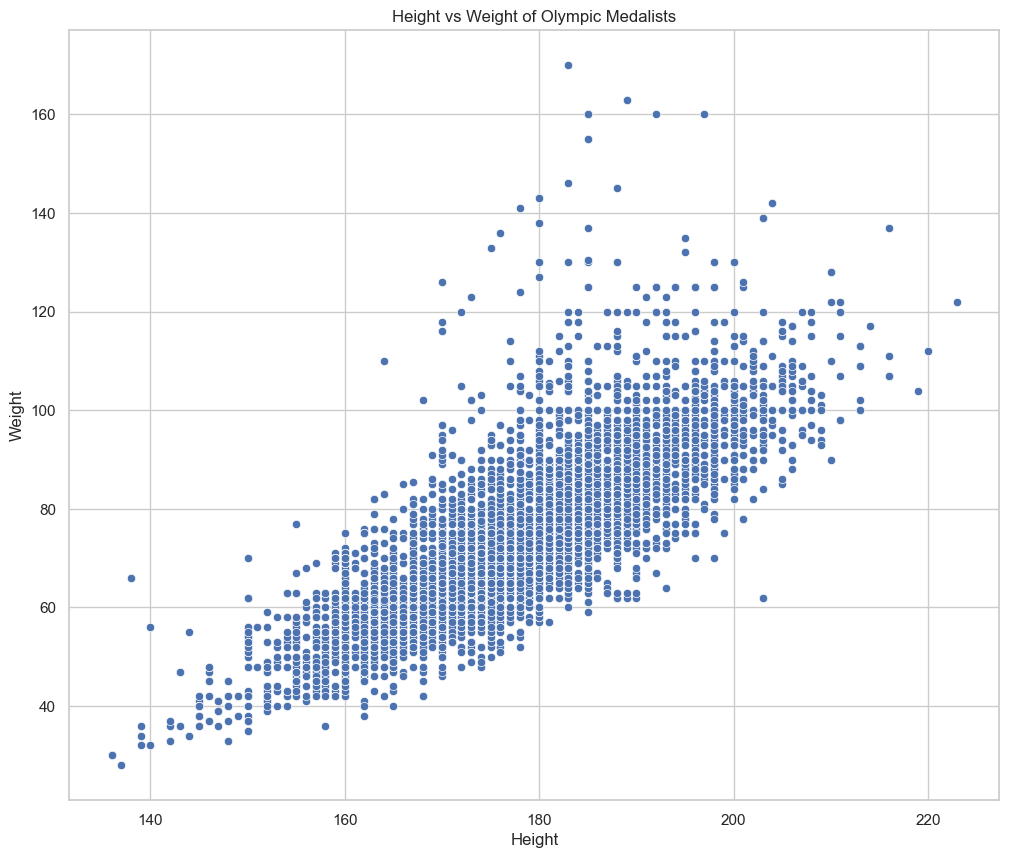

In [51]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')
plt.savefig("./height_weight_of_medalists.png")

Most of the data demonstrates a direct correlation between height and weight (as weight increases, so does height).

However, there are some exceptions that pique my curiosity!

For instance, I'm interested in finding out who the athlete is that weighs over 160 kilograms and which sport they play.

In [52]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
3884,Andrey Ivanovich Chemerkin,Male,24.0,183.0,170.0,1996,Summer,Weightlifting,Gold,Russia
29824,Leonid Ivanovych Zhabotynskiy,Male,26.0,189.0,163.0,1964,Summer,Weightlifting,Gold,Russia
29825,Leonid Ivanovych Zhabotynskiy,Male,30.0,189.0,163.0,1968,Summer,Weightlifting,Gold,Russia


Voila! That's Weight-lifting

![><](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Lasha_Talakhadze_Rio_2016.jpg/1200px-Lasha_Talakhadze_Rio_2016.jpg)

So. How about medalists taller than 210cm?

In [53]:
notNullMedals.loc[notNullMedals['Height'] > 210]

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
1843,"Walter Jones ""Walt"" Bellamy, Jr.",Male,23.0,211.0,98.0,1960,Summer,Basketball,Gold,USA
2178,Oleksandr Mykhailovych Bielostienniy,Male,29.0,214.0,117.0,1988,Summer,Basketball,Gold,Russia
3810,Tyson Cleotis Chandler,Male,29.0,216.0,107.0,2012,Summer,Basketball,Gold,USA
4536,"Melvin Grant ""Mel"" Counts",Male,22.0,213.0,102.0,1964,Summer,Basketball,Gold,USA
6638,Patrick Aloysius Ewing,Male,21.0,213.0,109.0,1984,Summer,Basketball,Gold,USA
6639,Patrick Aloysius Ewing,Male,29.0,213.0,109.0,1992,Summer,Basketball,Gold,USA
7422,"Marcus Ross ""Marc"" Freiberger",Male,23.0,211.0,98.0,1952,Summer,Basketball,Gold,USA
10111,Valeriy Hryhorovych Hoborov,Male,23.0,211.0,115.0,1988,Summer,Basketball,Gold,Russia
10433,Dwight David Howard,Male,22.0,211.0,120.0,2008,Summer,Basketball,Gold,USA
10801,Darrall Tucker Imhoff,Male,21.0,211.0,98.0,1960,Summer,Basketball,Gold,USA


Most of them come from Basketball. That's make sense!

![](https://nbcsports.brightspotcdn.com/dims4/default/c22bf50/2147483647/strip/true/crop/3313x1864+0+68/resize/1440x810!/quality/90/?url=https%3A%2F%2Fnbc-sports-production-nbc-sports.s3.us-east-1.amazonaws.com%2Fbrightspot%2F8e%2F3a%2F91379ba04b83b97abd3b395470a8%2Fhttps-delivery-gettyimages.com%2Fdownloads%2F1627092720)